In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing 
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

In [29]:
df=pd.read_csv('C:\\Users\\hp\\Desktop\\Book2.csv')

In [30]:
df

,total_sqft,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,95.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,204.00
7,3300,4,600.00
8,1310,3,63.25
9,1020,6,370.00


In [38]:
scaled_x=sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [39]:
scaled_x

array([[0.16888889, 0.2       ],
       [0.74074074, 0.6       ],
       [0.31111111, 0.4       ],
       [0.34111111, 0.4       ],
       [0.22222222, 0.2       ],
       [0.21111111, 0.2       ],
       [0.78962963, 0.6       ],
       [1.        , 0.6       ],
       [0.26296296, 0.4       ],
       [0.15555556, 1.        ],
       [0.44444444, 0.4       ],
       [0.80925926, 0.6       ],
       [0.14814815, 0.2       ],
       [0.18518519, 0.2       ],
       [0.61111111, 0.4       ],
       [0.21296296, 0.2       ],
       [0.21481481, 0.4       ],
       [0.34814815, 0.4       ],
       [0.8037037 , 0.4       ],
       [0.18518519, 0.2       ],
       [0.        , 0.        ],
       [0.42777778, 0.4       ],
       [0.81481481, 0.6       ],
       [0.43222222, 0.4       ]])

In [40]:
scaled_y

array([[0.02768244],
       [0.16796672],
       [0.06742936],
       [0.12463165],
       [0.04836193],
       [0.0258277 ],
       [0.31357254],
       [1.        ],
       [0.06959612],
       [0.60131739],
       [0.08129659],
       [0.47131219],
       [0.0258277 ],
       [0.02929451],
       [0.21650199],
       [0.08736349],
       [0.04316173],
       [0.06396256],
       [0.46264517],
       [0.04316173],
       [0.00372682],
       [0.05702895],
       [0.        ],
       [0.10036401]])

In [109]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    for i  in range (epochs):
     y_predicted=np.dot(w,scaled_x.T)+b
     w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
     b_grad=-(2/total_samples)*(np.sum(y_true-y_predicted))
     
        
     w=w-learning_rate*w_grad
     b=b-learning_rate*b_grad
    
     cost=np.mean(np.square(y_true-y_predicted))
    
     if i%10==0:
        
        cost_list.append(cost)
        epoch_list.append(i)
        
    return w,b,cost,cost_list,epoch_list
w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1000)


In [110]:
w,b,cost,cost_list,epoch_list

(array([0.41836408, 0.59463284]),
 -0.23800254848438993,
 0.029778954427842147,
 [0.4905878496406493,
  0.3076501980637707,
  0.2012745756231784,
  0.13929503997315315,
  0.10306292747174345,
  0.08176631475994278,
  0.06913668806679636,
  0.061539612319658904,
  0.056867783492673275,
  0.053899268060965656,
  0.05192543782550226,
  0.05053526245491191,
  0.049490251474044254,
  0.04865195088574281,
  0.047939908700318966,
  0.04730730502409808,
  0.04672682329933945,
  0.04618245892467624,
  0.045664770115753366,
  0.0451681244315078,
  0.04468910230462348,
  0.0442255713564134,
  0.043776149606851424,
  0.04333989415244947,
  0.0429161205638063,
  0.04250429807184689,
  0.04210398869606036,
  0.04171481185131873,
  0.04133642372890474,
  0.040968505245739084,
  0.04061075496375476,
  0.0402628848933494,
  0.039924617971431126,
  0.03959568651278101,
  0.039275831228094485,
  0.03896480057288407,
  0.038662350290463,
  0.03836824306964693,
  0.038082248271102896,
  0.03780414169557543

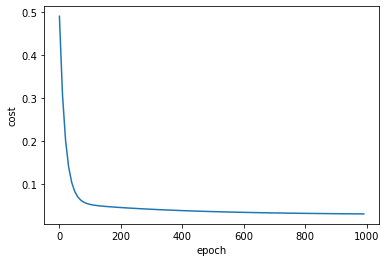

In [111]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)


In [112]:
import random

In [119]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    for i  in range (epochs):
     random_index=random.randint(0,total_samples-1)
     samples_x=x[random_index]
     samples_y=y_true[random_index]
     y_predicted=np.dot(w,samples_x.T)+b
     w_grad=-(2/total_samples)*(samples_x.T.dot(samples_y-y_predicted))
     b_grad=-(2/total_samples)*(np.sum(samples_y-y_predicted))
     
        
     w=w-learning_rate*w_grad
     b=b-learning_rate*b_grad
    
     cost=np.square(samples_y-y_predicted)
    
     if i%10==0:
        
        cost_list.append(cost)
        epoch_list.append(i)
        
    return w,b,cost,cost_list,epoch_list
s_w,s_b,s_cost,s_cost_list,s_epoch_list=stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)


In [120]:
s_w,s_b,s_cost

(array([0.56942578, 0.68890208]), -0.3437998072265445, 0.018948821283294472)

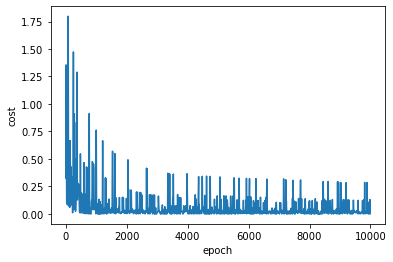

In [121]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(s_epoch_list,s_cost_list)


In [116]:
def minibatch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    for i  in range (epochs):
     for epoch in range(100):
       random_ids = np.random.randint(len(df), size=5)
       samples_x=x[random_ids]
       samples_y=y_true[random_ids]
       y_predicted=np.dot(w,samples_x.T)+b
       w_grad=-(2/total_samples)*(samples_x.T.dot(samples_y-y_predicted))
       b_grad=-(2/total_samples)*(np.sum(samples_y-y_predicted))
     
        
     w=w-learning_rate*w_grad
     b=b-learning_rate*b_grad
    
     cost=np.mean(np.square(samples_y-y_predicted))
    
     if i%10==0:
        
        cost_list.append(cost)
        epoch_list.append(i)
        
    return w,b,cost,cost_list,epoch_list
m_w,m_b,m_cost,m_cost_list,m_epoch_list=minibatch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1000)


In [117]:
m_w,m_b,m_cost




(array([0.6513615 , 0.73065513]), -0.39701554917589504, 0.03327211936615063)

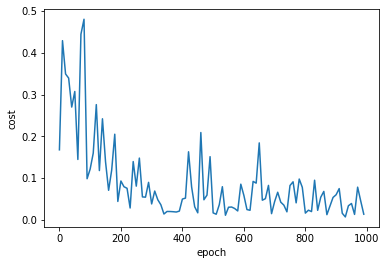

In [118]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(m_epoch_list,m_cost_list)